In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/HW1_NNF/')  # Add the directory containing the file to the Python path
from mmt_5data_scoring import Data_Scoring_Unsupervised
from mmt_5data_scoring import module_data_scoring_unsupervised


In [5]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torch
import torchvision
from torch.utils.data import ConcatDataset
import torch
import torchvision
from torchvision import transforms

# Define a custom transformation to flatten the images
class FlattenTransform:
    def __call__(self, image):
        return image.view(-1)

# Define the transformations
transform = transforms.Compose([transforms.ToTensor(), FlattenTransform()])

dataset  = torchvision.datasets.MNIST(root='./data',train=True,transform=transform,download=True)


num_samples_per_class = 1000


total_samples = num_samples_per_class * 10


class_indices = dataset.targets.unique()
datasets_per_class = []
for class_index in class_indices:
    class_samples = [i for i, label in enumerate(dataset.targets) if label == class_index]
    selected_samples = class_samples[:num_samples_per_class]
    selected_dataset = torch.utils.data.Subset(dataset, selected_samples)
    datasets_per_class.append(selected_dataset)

dataset = ConcatDataset(datasets_per_class)

# Get the data and labels from the concatenated dataset
data = torch.stack([dataset[i][0] for i in range(len(dataset))])
labels = torch.tensor([dataset[i][1] for i in range(len(dataset))]).view(-1, 1)


In [6]:
from LinearDensityIndex import Kalhor_LinearDensityIndex
from ldi_data_scoring import Data_Scoring_Unsupervised
kmeans_repeat = 20
instant = Kalhor_LinearDensityIndex(data)
n_max_clusters=20
print('n_max_clusters', n_max_clusters)
n_cluster_h, label_data, av_lin_den,sum_lin_den, center_clusters = instant.ldi_clustering(n_max_clusters, kmeans_repeat)
print('Number of clusters is: ', n_cluster_h)
print('sum of linear density is: ', sum_lin_den.detach().cpu().numpy())


n_max_clusters 20
Number of clusters is:  1
sum of linear density is:  1893.364


In [7]:
from mmt_5data_scoring import Data_Scoring_Unsupervised
from mmt_5data_scoring import module_data_scoring_unsupervised
import torchvision.transforms as transforms

# Flatten the images
mnist_data = data.data.view(-1, 28 * 28).float()

# Set up the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mnist_data = mnist_data.to(device)

n_max_clusters = 20
normalize_do = True
mnist_scores = module_data_scoring_unsupervised(mnist_data, n_max_clusters, normalize_do=normalize_do)
print('MNIST Scores shape:', mnist_scores.shape)


data torch.Size([10000, 784])
n_max_clusters 20
the predicted number of clusters is: 1
MNIST Scores shape: torch.Size([10000])


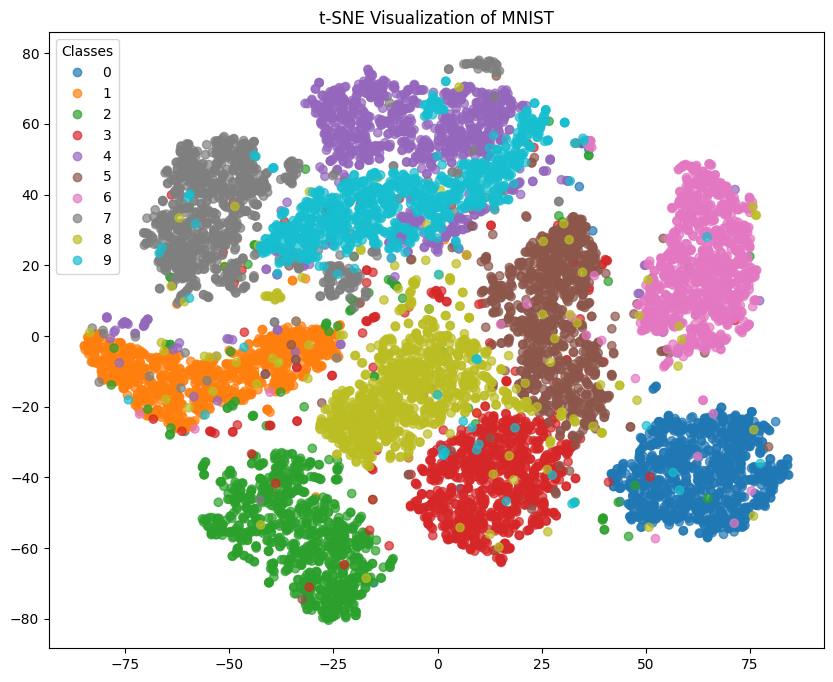

In [17]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import ConcatDataset
from torchvision import datasets, transforms

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
dataset  = torchvision.datasets.MNIST(root='./data',train=True,transform=transform,download=True)


num_samples_per_class = 1000


total_samples = num_samples_per_class * 10


class_indices = dataset.targets.unique()
datasets_per_class = []
for class_index in class_indices:
    class_samples = [i for i, label in enumerate(dataset.targets) if label == class_index]
    selected_samples = class_samples[:num_samples_per_class]
    selected_dataset = torch.utils.data.Subset(dataset, selected_samples)
    datasets_per_class.append(selected_dataset)

dataset = ConcatDataset(datasets_per_class)
data_subset = torch.stack([dataset[i][0].view(-1) for i in range(total_samples)])
labels_subset = torch.tensor([dataset[i][1] for i in range(total_samples)])

# Convert to NumPy array
data_subset_np = data_subset.numpy()

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
mnist_tsne = tsne.fit_transform(data_subset_np)

# Visualize the result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(mnist_tsne[:, 0], mnist_tsne[:, 1], c=labels_subset, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("t-SNE Visualization of MNIST")
plt.show()


In [18]:
mnist_tsne_array = tsne.fit_transform(data_subset_np)

# Convert numpy array to PyTorch tensor
mnist_tsne = torch.tensor(mnist_tsne_array, dtype=torch.float32)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mnist_tsne = mnist_tsne.to(device)

In [23]:
from LinearDensityIndex import Kalhor_LinearDensityIndex
from ldi_data_scoring import Data_Scoring_Unsupervised
kmeans_repeat = 20
instant = Kalhor_LinearDensityIndex(mnist_tsne)
n_max_clusters=40
print('n_max_clusters', n_max_clusters)
n_cluster_h, label_data, av_lin_den,sum_lin_den, center_clusters = instant.ldi_clustering(n_max_clusters, kmeans_repeat)
print('Number of clusters is: ', n_cluster_h)
print('sum of linear density is: ', sum_lin_den.detach().cpu().numpy())


n_max_clusters 40
Number of clusters is:  20
sum of linear density is:  146.00197


In [19]:
n_max_clusters = 80
normalize_do = True
mnist_scores = module_data_scoring_unsupervised(mnist_tsne, n_max_clusters, normalize_do=normalize_do)
print('MNIST Scores shape:', mnist_scores.shape)

data torch.Size([10000, 2])
n_max_clusters 80
the predicted number of clusters is: 48
MNIST Scores shape: torch.Size([10000])


In [20]:
mnist_scores

tensor([0.4052, 0.4705, 0.8325,  ..., 0.5337, 0.1717, 0.7875])